## 영화 리뷰 분석
---
- IMDB 데이터 활용

In [20]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from tensorflow.keras.datasets.imdb import load_data
from tensorflow.keras.utils import pad_sequences
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np

## [1] 데이터 준비

In [5]:
(X_train, y_train), (X_test, y_test)=load_data()

In [9]:
print(f'imDF 정보 \nX_train: {X_train.shape}, y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}, y_test : {y_test.shape}')

imDF 정보 
X_train: (25000,), y_train : (25000,)
X_test : (25000,), y_test : (25000,)


In [10]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [13]:
for idx in range(3):
    print(f'[{idx} - {y_train[idx]}]\n{X_train[idx]}')
    print('--------------------------------------------------------------')

[0 - 1]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
----------------------------

## [2] 학습용 데이터 변환
---
- keras에서 이미 대부분의 전처리 끝난 데이터
- 길이 조정 => 패딩(Padding)
- https://www.dinolabs.ai/189

In [22]:
pad_sequences(X_train)

array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]])

In [40]:
print(len(pad_sequences(X_train)))

25000


In [46]:
# [2-1]데이터별 길이 결정
padded = pad_sequences(X_train)
padded

array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]])

In [47]:
print(padded.shape)

(25000, 2494)


In [51]:
# [2-2]데이터별 길이 변경
padded1 = pad_sequences(X_train, maxlen=100)
padded1

array([[ 1415,    33,     6, ...,    19,   178,    32],
       [  163,    11,  3215, ...,    16,   145,    95],
       [ 1301,     4,  1873, ...,     7,   129,   113],
       ...,
       [   11,     6,  4065, ...,     4,  3586, 22459],
       [  100,  2198,     8, ...,    12,     9,    23],
       [   78,  1099,    17, ...,   204,   131,     9]])

In [52]:
print(padded1.shape)

(25000, 100)


In [54]:
# (1) 전체 리뷰의 길이 측정
all_length=np.array([len(x) for x in X_train])

print(f'all_length : {np.mean(all_length)}, {np.median(all_length)}')

np.unique(all_length)
np.unique(all_length, return_counts=True)

all_length : 238.71364, 178.0


(array([  11,   12,   13, ..., 1851, 1854, 2494]),
 array([2, 1, 2, ..., 1, 1, 1], dtype=int64))

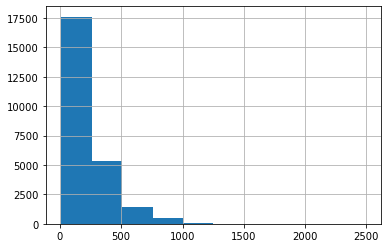

In [55]:
import matplotlib.pyplot as plt

plt.hist(all_length)
plt.grid()
plt.show()

In [61]:
# [2-2] 데이터별 길이 변경
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100)
train_seq.shape
# to_categorical()

(25000, 100)

In [60]:
train_seq

array([[ 1415,    33,     6, ...,    19,   178,    32],
       [  163,    11,  3215, ...,    16,   145,    95],
       [ 1301,     4,  1873, ...,     7,   129,   113],
       ...,
       [   11,     6,  4065, ...,     4,  3586, 22459],
       [  100,  2198,     8, ...,    12,     9,    23],
       [   78,  1099,    17, ...,   204,   131,     9]])